### Real data

In [6]:
# Import my .py code 
# Run this to reimport without having to restart the whole notebook
import calibration_functions
import importlib
importlib.reload(calibration_functions)
from calibration_functions import *

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm as tqdm
import pandas as pd

plt.rcParams['font.size'] = 16
plt.rc("font", family="serif")

In [8]:
filename = "/Users/jakobharteg/Desktop/34411_spectra/34411_201127.1108.fits"
hdu1 = fits.open(filename)
# hdu1.info()

hdu1[1].header

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jakobharteg/Desktop/34411_spectra/34411_201127.1108.fits'

In [5]:
# filename = r"expres_tp/LFC_200907.1063.fits"
# filename = "/Users/jakobharteg/kDrive/Uni/Kurser/Bachelorprojekt/Data/EXPRES_spectra/spectra/34411_210103.1100.fits"
filename = "/Users/jakobharteg/Desktop/34411_spectra/34411_201127.1108.fits"
hdu1 = fits.open(filename)
hdu1.info()

order = 45
data = hdu1[1].data.copy()
data_spec       = data['spectrum'][order]
data_spec_err   = data['uncertainty'][order]
data_wavel      = data['wavelength'][order]

Filename: /Users/jakobharteg/Desktop/34411_spectra/34411_201127.1108.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (7920, 86)   float64   
  1  optimal       1 BinTableHDU     97   86R x 17C   [7920D, 7920D, 7920D, 7920D, 7920D, 7920I, 7920D, 7920L, 7920D, 7920D, 7920D, I, 7920D, 7920D, 7920D, 7920D, 7920L]   
  2  EXPOSURE METER + BARY_CORR    1 BinTableHDU     64   240R x 3C   [512D, D, 512D]   


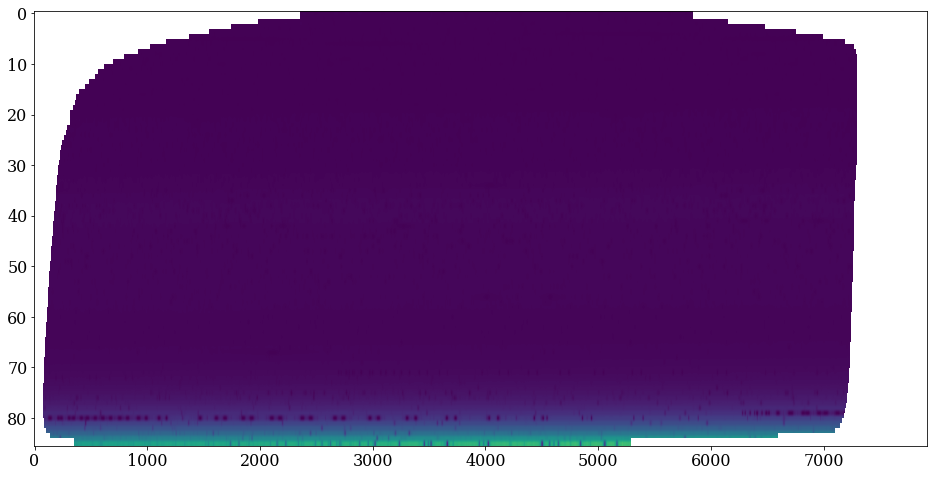

In [18]:
# Plot all data in imshow
orders_pix = np.array([data['spectrum'][o] for o in np.arange(len(data['spectrum']))]) # create 2d array
plt.figure(figsize=(16, 8))

plt.imshow(orders_pix, aspect="auto")
# plt.savefig("figures/CCF.png", dpi=1000)
# plt.savefig("figures/CCF_300dpi.png", dpi=100)

# Plot order by order
# for order in np.arange(len(data)):
#     data_spec       = data['spectrum'][order]
#     fig, ax = plt.subplots(figsize=(16,2))
#     ax.set_title(f"{order}. order")
#     ax.plot(data_spec)

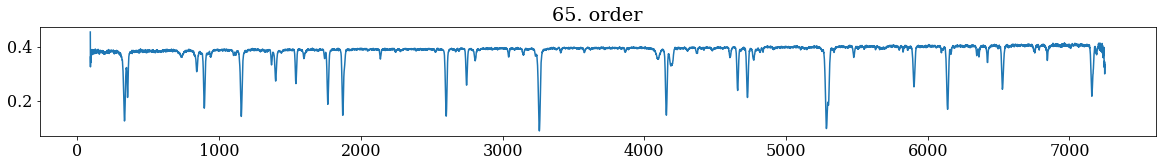

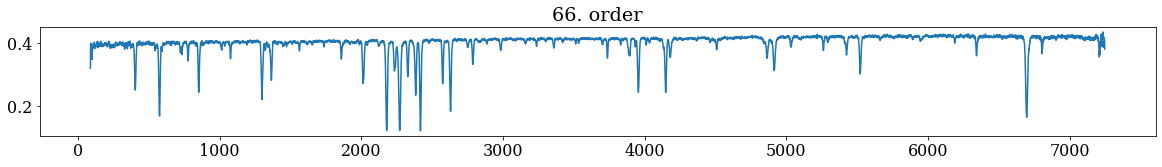

In [31]:
order = 65

fig, ax = plt.subplots(figsize=(20,2))
ax.set_title(f"{order}. order")
ax.plot(data['spectrum'][order])

fig, ax = plt.subplots(figsize=(20,2))
ax.set_title(f"{order}. order")
ax.plot(data['spectrum'][order],  ".")
ax.set_xlim(3000, 3900)

### Apply interpolation calibration

(5310.0, 5311.5)

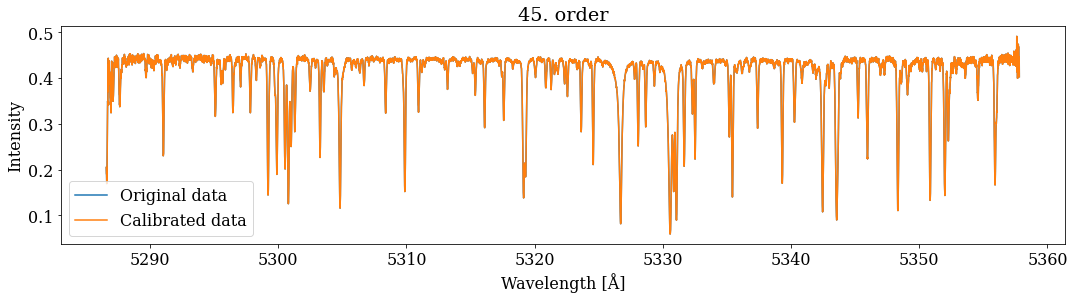

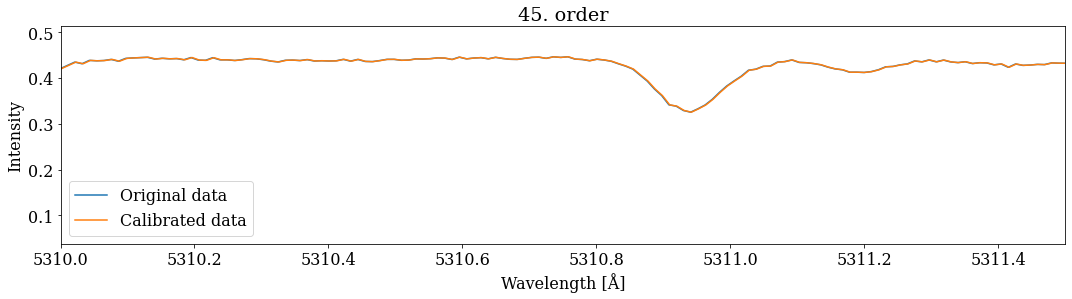

In [28]:
# Load interpolation object
f3 = np.load("fit_results/interp_order45.npy", allow_pickle=True).item(0)

order = 45

def plot(ax):
    ax.set_title(f"{order}. order")
    
    # Plot original data with wavelength on x, so we can compare to calibration
    y = data['spectrum'][order]
    x = data['wavelength'][order]
    ax.plot(x, y, label="Original data")
    
    # apply calibration (pix --> wavelength),  pix is just the index position 
    x_calib = f3(range(len(y)))

    # Plot calibrated
    ax.plot(x_calib, y, label="Calibrated data")

    ax.set_xlabel("Wavelength [Å]")
    ax.set_ylabel("Intensity")
    ax.legend()


fig, ax = plt.subplots(figsize=(18,4))
plot(ax)

fig, ax = plt.subplots(figsize=(18,4))
plot(ax)
ax.set_xlim(5310, 5311.5)




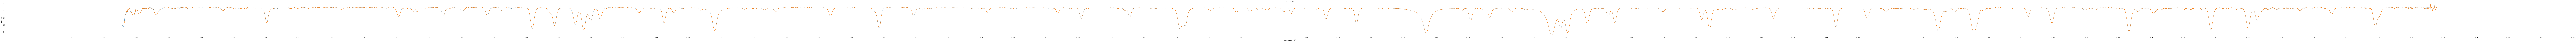

In [29]:
# Save large png for inspection
fig, ax = plt.subplots(figsize=(450,6))
ax.set_title(f"{order}. order")
x = data['wavelength'][order]
y = data['spectrum'][order]
ax.plot(x, y, label="Original data")
x_calib = f3(range(len(x)))
ax.plot(x_calib, y, label="Calibrated data")
ax.set_xlabel("Wavelength [Å]")
ax.set_ylabel("Intensity")

xticks = np.arange(int(min(x_calib)), int(max(x_calib)))
ax.set_xticks(xticks);

# fig.savefig("figures/calibration45.png")